In [1]:
import itertools

smoothing_methods = ["Identity", "Polynomial", "Softmax"]
store_methods = ["Always", "When New"]
shift_methods = ["Additive", "Multiplicative"]
storing_strength = ["Hard", "Soft"]
test_methods = itertools.product(
    store_methods, shift_methods, storing_strength, smoothing_methods
)

In [2]:
"""
0 - nothing

1 - rotate right by 6 degrees

2 - rotate left by 6 degrees

3 - accelerate forward

4 - accelerate forward and rotate CW by 6 degrees

5 - accelerate forward and rotate CCW by 6 degrees

6 - accelerate backward

7 - accelerate backward and rotate CW by 6 degrees

8 - accelerate backward and rotate CCW by 6 degrees
"""

forward_10 = [3] * 10
backward_10 = [6] * 10
forward_3 = [3] * 3
backward_3 = [6] * 3
turn_90_cw = [1] * 15  # = 90 / 6
turn_90_ccw = [2] * 15  # = 90 / 6

visible_15 = [True] * 15
visible_10 = [True] * 10
visible_3 = [True] * 3
not_visible_15 = [False] * 15
not_visible_10 = [False] * 10
not_visible_3 = [False] * 3

path = (
    forward_10
    + turn_90_cw
    + forward_3
    + turn_90_cw
    + forward_10
    + turn_90_cw
    + forward_3
    + turn_90_cw
    + forward_10
)

visibles = (
    visible_10
    + visible_15
    + not_visible_3
    + not_visible_15
    + not_visible_10
    + not_visible_15
    + not_visible_3
    + not_visible_15
    + visible_10
)

noise_list = [[]] * len(path)
assert (
    len(path) == len(visibles) == len(visibles)
), "Path, visibles, and noise must be the same length"
print(f"total length: {len(path)}, path={list(zip(path, visibles, noise_list))}")

total length: 96, path=[(3, True, []), (3, True, []), (3, True, []), (3, True, []), (3, True, []), (3, True, []), (3, True, []), (3, True, []), (3, True, []), (3, True, []), (1, True, []), (1, True, []), (1, True, []), (1, True, []), (1, True, []), (1, True, []), (1, True, []), (1, True, []), (1, True, []), (1, True, []), (1, True, []), (1, True, []), (1, True, []), (1, True, []), (1, True, []), (3, False, []), (3, False, []), (3, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (3, False, []), (3, False, []), (3, False, []), (3, False, []), (3, False, []), (3, False, []), (3, False, []), (3, False, []), (3, False, []), (3, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False, []), (1, False

6
7
8
18
19
20


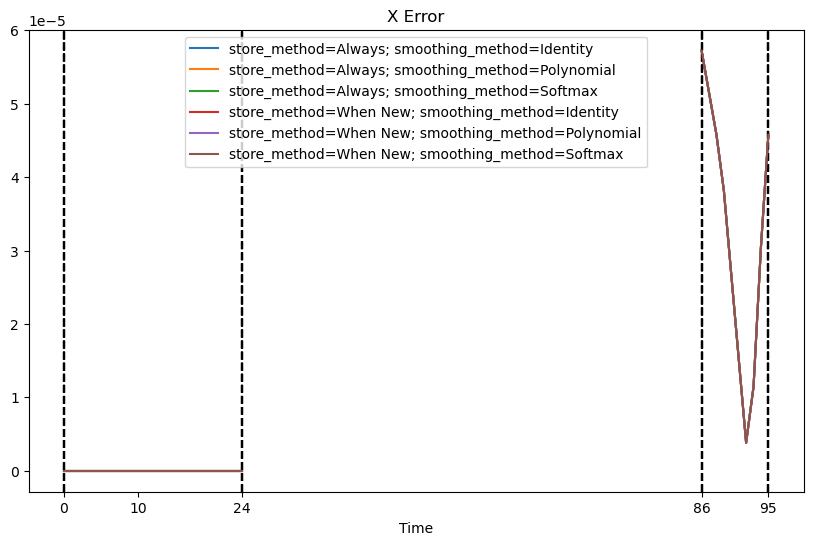

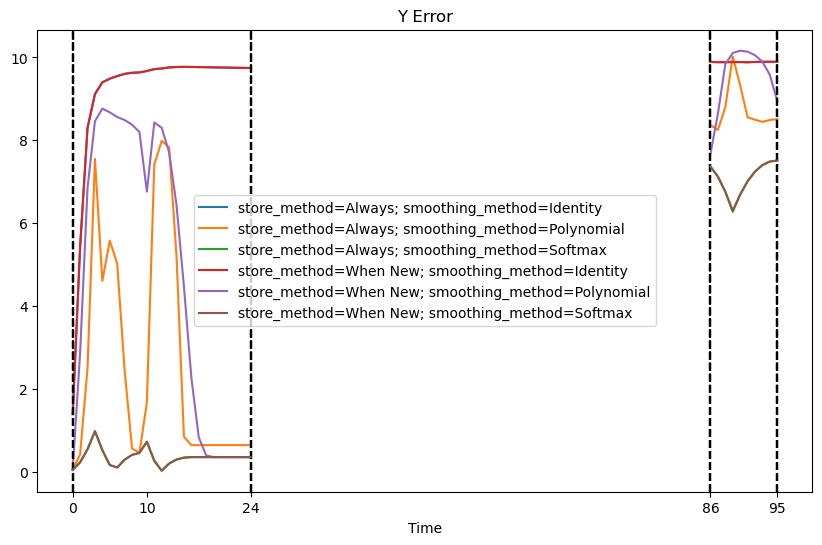

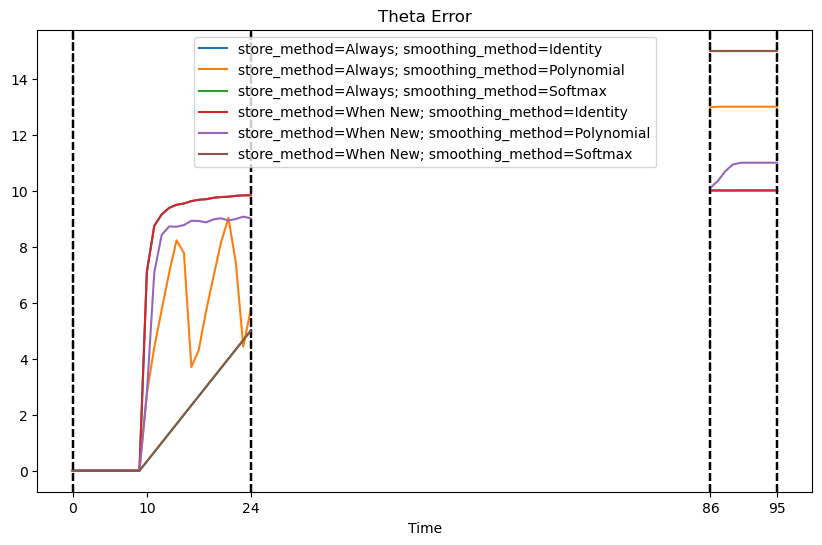

In [ ]:
from graph_utils import calculate_err_crossentropy
from matplotlib import pyplot as plt
import pickle
import copy
import numpy as np

figs = []
ax = []
for i in range(3):
    fig, a = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    figs.append(fig)
    ax.append(a)

def vertical_line(x, ax):
    ax.axvline(x=x, color="k", linestyle="--")


starts = []
ends = []
for i in range(len(path)):
    if visibles[i] == True:
        if i == 0 or visibles[i - 1] == False:
            starts.append(i)
        if i == len(path) - 1 or visibles[i + 1] == False:
            ends.append(i)

def error_test(true, belief):
    loss = 0
    for i in range(len(belief)):
        diff = abs(i - true)
        loss += belief[i] * min(diff, len(belief) - diff)
    return loss

# smoothing_methods = ["Identity", "Polynomial", "Softmax"]
# store_methods = ["Always", "When New"]
# shift_methods = ["Additive", "Multiplicative"]
# storing_strength = ["Hard", "Soft"]
# test_methods = itertools.product(
#     store_methods, shift_methods, storing_strength, smoothing_methods
# )
for i, (store_method, shift_method, storing_strength, smoothing_method) in enumerate(
    copy.deepcopy(test_methods)
):
    if shift_method == "Additive":
        continue
    if storing_strength == "Soft":
        continue
    # if store_method == "Always":
    #     continue

    print(i)
    with open(f"olivier/kidnapped_history_{i}.pkl", "rb") as f:
        history = pickle.load(f)

    true_pos = history._true_positions
    theta_pos = history._true_angles
    b_x_pos_dists = history._x_distributions
    b_y_pos_dists = history._y_distributions
    b_theta_pos_dists = history._theta_distributions

    first = True
    x_color = None
    y_color = None
    theta_color = None
    params_label = f"store_method={store_method}; smoothing_method={smoothing_method}"

    for start, end in zip(starts, ends):
        xs = np.arange(start, end + 1)

        x_errors = []
        y_errors = []
        theta_errors = []

        for j in range(start, end + 1):
            x_errors.append(error_test(true_pos[j][0], b_x_pos_dists[j]))
            y_errors.append(error_test(true_pos[j][1], b_y_pos_dists[j]))
            theta_errors.append(error_test(theta_pos[j], b_theta_pos_dists[j]))

        vertical_line(start, ax[0])
        vertical_line(start, ax[1])
        vertical_line(start, ax[2])
        vertical_line(end, ax[0])
        vertical_line(end, ax[1])
        vertical_line(end, ax[2])

        label = params_label if first else None
        l0 = ax[0].plot(xs, x_errors, color=x_color, label=label)
        l1 = ax[1].plot(xs, y_errors, color=y_color, label=label)
        l2 = ax[2].plot(xs, theta_errors, color=theta_color, label=label)

        if first:
            x_color = l0[0].get_color()
            y_color = l1[0].get_color()
            theta_color = l2[0].get_color()
            first = False

ax[0].set_title("X Error")
ax[1].set_title("Y Error")
ax[2].set_title("Theta Error")
ax[0].set_xlabel("Time")
ax[1].set_xlabel("Time")
ax[2].set_xlabel("Time")

ax[0].set_xticks([0, 10, 24, 86, 95])
ax[1].set_xticks([0, 10, 24, 86, 95])
ax[2].set_xticks([0, 10, 24, 86, 95])


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()